<a href="https://colab.research.google.com/github/AjayJAjay/PlayStore-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

**Exploratory Analysis** ;
To begin this exploratory analysis, first we are going to use matplotlib to import libraries and define functions for plotting the data.

1.First procedure is to Importing all the packages and Data we required.

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

2. Now we have to Mount required content from gdrive.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


3. Create a path as **df=pd.read_csv** to attach a Play Store DATA and also for User Reviews in our Notebook.

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/EDA capston project/Play Store Data.csv', dtype='str')

In [5]:
df1 = pd.read_csv('/content/gdrive/MyDrive/EDA capston project/User Reviews.csv', dtype='str')


 Now use a **.head** method to get a quick look at the first 5 rows of data. Here we can make initial thoughts on what might need to be cleaned or manipulated. 

In [6]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Now use **.info** to get overall information of PlayStore Data.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10841 non-null  object
 1   Category        10841 non-null  object
 2   Rating          9367 non-null   object
 3   Reviews         10841 non-null  object
 4   Size            10841 non-null  object
 5   Installs        10841 non-null  object
 6   Type            10840 non-null  object
 7   Price           10841 non-null  object
 8   Content Rating  10840 non-null  object
 9   Genres          10841 non-null  object
 10  Last Updated    10841 non-null  object
 11  Current Ver     10833 non-null  object
 12  Android Ver     10838 non-null  object
dtypes: object(13)
memory usage: 1.1+ MB


Now use **.shape** to get overall *rows and columns* details.

In [8]:
df.shape

(10841, 13)

Now we have to use **DATA CLEANING PHASE** , by cleaning our data , we can recognise and analyse our data easily.

In [9]:
# clean columns names and values

def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    
clean_columns(df)

def clean_vals(df):
    for col in df.columns:
        df[col] = df[col].str.strip().str.upper().str.replace('\t|\n', '', regex=True)
     
clean_vals(df)

In [10]:
# now check the Data
df.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,PHOTO EDITOR & CANDY CAMERA & GRID & SCRAPBOOK,ART_AND_DESIGN,4.1,159,19M,"10,000+",FREE,0,EVERYONE,ART & DESIGN,"JANUARY 7, 2018",1.0.0,4.0.3 AND UP
1,COLORING BOOK MOANA,ART_AND_DESIGN,3.9,967,14M,"500,000+",FREE,0,EVERYONE,ART & DESIGN;PRETEND PLAY,"JANUARY 15, 2018",2.0.0,4.0.3 AND UP
2,"U LAUNCHER LITE – FREE LIVE COOL THEMES, HIDE ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",FREE,0,EVERYONE,ART & DESIGN,"AUGUST 1, 2018",1.2.4,4.0.3 AND UP
3,SKETCH - DRAW & PAINT,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",FREE,0,TEEN,ART & DESIGN,"JUNE 8, 2018",VARIES WITH DEVICE,4.2 AND UP
4,PIXEL DRAW - NUMBER ART COLORING BOOK,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",FREE,0,EVERYONE,ART & DESIGN;CREATIVITY,"JUNE 20, 2018",1.1,4.4 AND UP


**Size**

Now we need to see what letters there are in the size column so that we can normalize the data.

As we know that 1 MB is equal to 1024 KB.

In [11]:
print(df['size'].str.replace('\d+', '').unique())

['M' '.M' 'VARIES WITH DEVICE' 'K' '.K' ',+']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


From above code , we can see that we have our size data in the form of megabytes, kilobytes.

In [12]:
df.loc[df['size'].str.contains('M'),].head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,PHOTO EDITOR & CANDY CAMERA & GRID & SCRAPBOOK,ART_AND_DESIGN,4.1,159,19M,"10,000+",FREE,0,EVERYONE,ART & DESIGN,"JANUARY 7, 2018",1.0.0,4.0.3 AND UP
1,COLORING BOOK MOANA,ART_AND_DESIGN,3.9,967,14M,"500,000+",FREE,0,EVERYONE,ART & DESIGN;PRETEND PLAY,"JANUARY 15, 2018",2.0.0,4.0.3 AND UP
2,"U LAUNCHER LITE – FREE LIVE COOL THEMES, HIDE ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",FREE,0,EVERYONE,ART & DESIGN,"AUGUST 1, 2018",1.2.4,4.0.3 AND UP
3,SKETCH - DRAW & PAINT,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",FREE,0,TEEN,ART & DESIGN,"JUNE 8, 2018",VARIES WITH DEVICE,4.2 AND UP
4,PIXEL DRAW - NUMBER ART COLORING BOOK,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",FREE,0,EVERYONE,ART & DESIGN;CREATIVITY,"JUNE 20, 2018",1.1,4.4 AND UP


In [13]:
# Now we will converting mb data into kb data

def convert_mb_kb(df):
    df.loc[df['size'].str.contains('M'),'size'] = df.loc[df['size'].str.contains('M'),'size'].str.rstrip('M').astype(float) * 1024

convert_mb_kb(df)

In [14]:
df.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,PHOTO EDITOR & CANDY CAMERA & GRID & SCRAPBOOK,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",FREE,0,EVERYONE,ART & DESIGN,"JANUARY 7, 2018",1.0.0,4.0.3 AND UP
1,COLORING BOOK MOANA,ART_AND_DESIGN,3.9,967,14336.0,"500,000+",FREE,0,EVERYONE,ART & DESIGN;PRETEND PLAY,"JANUARY 15, 2018",2.0.0,4.0.3 AND UP
2,"U LAUNCHER LITE – FREE LIVE COOL THEMES, HIDE ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000+",FREE,0,EVERYONE,ART & DESIGN,"AUGUST 1, 2018",1.2.4,4.0.3 AND UP
3,SKETCH - DRAW & PAINT,ART_AND_DESIGN,4.5,215644,25600.0,"50,000,000+",FREE,0,TEEN,ART & DESIGN,"JUNE 8, 2018",VARIES WITH DEVICE,4.2 AND UP
4,PIXEL DRAW - NUMBER ART COLORING BOOK,ART_AND_DESIGN,4.3,967,2867.2,"100,000+",FREE,0,EVERYONE,ART & DESIGN;CREATIVITY,"JUNE 20, 2018",1.1,4.4 AND UP


In [15]:
# Now we will see our unique letters  present in dataset

print(df['size'].astype(str).str.replace('\d+', '').unique())

['.' 'VARIES WITH DEVICE' 'K' '.K' ',+']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until



Now we can simply remove the K and change the size column to say "size (in kb)" for clarity.

In [16]:
df.loc[df['size'].astype(str).str.contains('K'), 'size'] = df.loc[df['size'].astype(str).str.contains('K'), 'size'].str.replace('K', '')

In [17]:
# we can see that there are now no more values containing the letter K

df.loc[df['size'].astype(str).str.contains('K'), 'size']

Series([], Name: size, dtype: object)

In [18]:
# now we will add and clarify to the size column

df.rename(columns = {'size': 'size(kb)'}, inplace=True)

In [19]:
# cross check

df.columns

Index(['app', 'category', 'rating', 'reviews', 'size(kb)', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

We know that **VARIES WITH DEVICE** means unknown, or np.nan. So lets change replace those values.

In [20]:
df['size(kb)'].replace('VARIES WITH DEVICE', np.nan, inplace=True)

In [21]:
df.loc[df['size(kb)'].isnull(),]

,app,category,rating,reviews,size(kb),installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
37,FLOOR PLAN CREATOR,ART_AND_DESIGN,4.1,36639,NaN,"5,000,000+",FREE,0,EVERYONE,ART & DESIGN,"JULY 14, 2018",VARIES WITH DEVICE,2.3.3 AND UP
42,TEXTGRAM - WRITE ON PHOTOS,ART_AND_DESIGN,4.4,295221,NaN,"10,000,000+",FREE,0,EVERYONE,ART & DESIGN,"JULY 30, 2018",VARIES WITH DEVICE,VARIES WITH DEVICE
52,USED CARS AND TRUCKS FOR SALE,AUTO_AND_VEHICLES,4.6,17057,NaN,"1,000,000+",FREE,0,EVERYONE,AUTO & VEHICLES,"JULY 30, 2018",VARIES WITH DEVICE,VARIES WITH DEVICE
67,ULYSSE SPEEDOMETER,AUTO_AND_VEHICLES,4.3,40211,NaN,"5,000,000+",FREE,0,EVERYONE,AUTO & VEHICLES,"JULY 30, 2018",VARIES WITH DEVICE,VARIES WITH DEVICE
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,NaN,"100,000+",FREE,0,EVERYONE,AUTO & VEHICLES,"MAY 25, 2018",VARIES WITH DEVICE,VARIES WITH DEVICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,MY EARTHQUAKE ALERTS - US & WORLDWIDE EARTHQUAKES,WEATHER,4.4,3471,NaN,"100,000+",FREE,0,EVERYONE,WEATHER,"JULY 24, 2018",VARIES WITH DEVICE,VARIES WITH DEVICE
10725,POSTA APP,MAPS_AND_NAVIGATION,3.6,8,NaN,"1,000+",FREE,0,EVERYONE,MAPS & NAVIGATION,"SEPTEMBER 27, 2017",VARIES WITH DEVICE,4.4 AND UP
10765,CHAT FOR STRANGERS - VIDEO CHAT,SOCIAL,3.4,622,NaN,"100,000+",FREE,0,MATURE 17+,SOCIAL,"MAY 23, 2018",VARIES WITH DEVICE,VARIES WITH DEVICE
10826,FRIM: GET NEW FRIENDS ON LOCAL CHAT ROOMS,SOCIAL,4.0,88486,NaN,"5,000,000+",FREE,0,MATURE 17+,SOCIAL,"MARCH 23, 2018",VARIES WITH DEVICE,VARIES WITH DEVICE


From this we can see that there are 1695 rows that have NaN values and get a general idea of the context of those values.

In [22]:
def chk_null_sum(df, col):
    return df[col].isnull().sum()

chk_null_sum(df, 'size(kb)')

1695

In [23]:
# now we will remove the "+"

def remove_plus(df, col):
    df[col] = df[col].astype(str).str.replace('+', '', regex=False)

remove_plus(df, 'size(kb)')

In [24]:
# cross check

df.loc[df['size(kb)'].astype(str).str.contains('+', regex=False),]

,app,category,rating,reviews,size(kb),installs,type,price,content_rating,genres,last_updated,current_ver,android_ver


In [25]:
# removing commas

def remove_commas(df, col):
    df[col] = df[col].str.replace(',', '')

remove_commas(df, 'size(kb)')

In [26]:
# convert column size data type to numeric

def convert_to_numeric(df, col):
    df[col] = pd.to_numeric(df[col], errors='coerce')

convert_to_numeric(df, 'size(kb)')

I am using coerce here because I know that anything being coerced is already a nan value.

NaN values in size column To deal with these missing values, we can fill them with the mean value, grouped by category, so that it does not affect our standard deviation.

In [27]:
df['size(kb)'] = df['size(kb)'].astype(float).fillna(df.groupby('category')['size(kb)'].transform('mean'))

In [28]:
# cross check

df.isnull().sum()

app                  0
category             0
rating            1474
reviews              0
size(kb)             0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

**Last** **Updated**

For this analysis, I only want the year so i will remove everything before the comma in the last_updated row.

In [29]:
df['last_updated'].unique()

array(['JANUARY 7, 2018', 'JANUARY 15, 2018', 'AUGUST 1, 2018', ...,
       'JANUARY 20, 2014', 'FEBRUARY 16, 2014', 'MARCH 23, 2014'],
      dtype=object)

In [30]:
cond = df.loc[df['last_updated'] == '1.0.19',].index

This row has been currupted, so we will remove it from the dataframe.

In [31]:
df.drop(cond, inplace=True)

In [32]:
def convert_datetime(df, col):
    df[col] = pd.to_datetime(df[col])
    
def extract_year_dt(df, col):
    df[col] = df[col].dt.year
    
    
convert_datetime(df, 'last_updated')
extract_year_dt(df, 'last_updated')

In [33]:
# cross check

print(df['last_updated'])

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
10836    2017
10837    2018
10838    2017
10839    2015
10840    2018
Name: last_updated, Length: 10840, dtype: int64


**Installs**

Lets remove any non numeric digits and convert the datatype to numeric.

In [34]:
df['installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [35]:
remove_plus(df, 'installs')
remove_commas(df, 'installs')

In [36]:
def to_numeric(df, col):
    return pd.to_numeric(df[col])

In [37]:
df['installs'] = to_numeric(df, 'installs')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10840 non-null  object 
 1   category        10840 non-null  object 
 2   rating          9366 non-null   object 
 3   reviews         10840 non-null  object 
 4   size(kb)        10840 non-null  float64
 5   installs        10840 non-null  int64  
 6   type            10839 non-null  object 
 7   price           10840 non-null  object 
 8   content_rating  10840 non-null  object 
 9   genres          10840 non-null  object 
 10  last_updated    10840 non-null  int64  
 11  current_ver     10832 non-null  object 
 12  android_ver     10838 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.2+ MB


**Current_ver and Android_ver**

We dont need current_ver or android_ver for this anlalysis so we will remove those.

In [39]:
df = df.drop(['current_ver', 'android_ver'], axis=1)

In [40]:
df.head()

,app,category,rating,reviews,size(kb),installs,type,price,content_rating,genres,last_updated
0,PHOTO EDITOR & CANDY CAMERA & GRID & SCRAPBOOK,ART_AND_DESIGN,4.1,159,19456.0,10000,FREE,0,EVERYONE,ART & DESIGN,2018
1,COLORING BOOK MOANA,ART_AND_DESIGN,3.9,967,14336.0,500000,FREE,0,EVERYONE,ART & DESIGN;PRETEND PLAY,2018
2,"U LAUNCHER LITE – FREE LIVE COOL THEMES, HIDE ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,FREE,0,EVERYONE,ART & DESIGN,2018
3,SKETCH - DRAW & PAINT,ART_AND_DESIGN,4.5,215644,25600.0,50000000,FREE,0,TEEN,ART & DESIGN,2018
4,PIXEL DRAW - NUMBER ART COLORING BOOK,ART_AND_DESIGN,4.3,967,2867.2,100000,FREE,0,EVERYONE,ART & DESIGN;CREATIVITY,2018


**Rating, Reviews and Price To Numeric**

Lets go ahead and convert these columns to numeric.

In [41]:
# remove $ from price column

def remove_money_symbol(df, col):
    df[col] = pd.to_numeric(df[col].str.replace('$', ''))

remove_money_symbol(df, 'price')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [42]:
df['rating'] = to_numeric(df, 'rating')
df['price'] = to_numeric(df, 'price')
df['reviews'] = to_numeric(df, 'reviews')


Once again, lets use a fillna method grouped by category to take care of NaN values in price.

In [43]:
df['price'] = df['price'].astype(float).fillna(df.groupby('category')['price'].transform('mean'))

In [44]:
df['rating'] = df['rating'].astype(float).fillna(df.groupby('category')['rating'].transform('mean'))

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10840 non-null  object 
 1   category        10840 non-null  object 
 2   rating          10840 non-null  float64
 3   reviews         10840 non-null  int64  
 4   size(kb)        10840 non-null  float64
 5   installs        10840 non-null  int64  
 6   type            10839 non-null  object 
 7   price           10840 non-null  float64
 8   content_rating  10840 non-null  object 
 9   genres          10840 non-null  object 
 10  last_updated    10840 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1016.2+ KB


**TYPE**

We see using .unique() that there is one null value. Upon further inspection of this value, it seems nonsensical so we will drop this row.

In [46]:
df['type'].unique()

array(['FREE', 'PAID', nan], dtype=object)

In [47]:
df.loc[df['type'].isnull()]

,app,category,rating,reviews,size(kb),installs,type,price,content_rating,genres,last_updated
9148,COMMAND & CONQUER: RIVALS,FAMILY,4.192272,0,28998.679803,0,NaN,0.0,EVERYONE 10+,STRATEGY,2018


In [48]:
df.dropna(subset=['type'], inplace=True)


Now we will do sum final check of the data set with .info and .sample before going into EDA

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10839 non-null  object 
 1   category        10839 non-null  object 
 2   rating          10839 non-null  float64
 3   reviews         10839 non-null  int64  
 4   size(kb)        10839 non-null  float64
 5   installs        10839 non-null  int64  
 6   type            10839 non-null  object 
 7   price           10839 non-null  float64
 8   content_rating  10839 non-null  object 
 9   genres          10839 non-null  object 
 10  last_updated    10839 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1016.2+ KB


In [50]:
df.sample(5)

,app,category,rating,reviews,size(kb),installs,type,price,content_rating,genres,last_updated
10828,MANGA-FR - ANIME VOSTFR,COMICS,3.4,291,13312.0,10000,FREE,0.0,EVERYONE,COMICS,2017
8484,DK VERK,BUSINESS,4.4,9,31744.0,500,FREE,0.0,EVERYONE,BUSINESS,2018
5970,EXPLORE BRITISH COLUMBIA - BC TRAVEL GUIDE,TRAVEL_AND_LOCAL,4.4,7,17408.0,500,FREE,0.0,EVERYONE,TRAVEL & LOCAL,2017
752,QUIZ&LEARN PYTHON,EDUCATION,4.0,304,2048.0,10000,FREE,0.0,EVERYONE,EDUCATION,2016
7548,APPLOCK - FINGERPRINT UNLOCK,TOOLS,4.5,112482,2150.4,5000000,FREE,0.0,EVERYONE,TOOLS,2018


In [51]:
df.head(-10)

,app,category,rating,reviews,size(kb),installs,type,price,content_rating,genres,last_updated
0,PHOTO EDITOR & CANDY CAMERA & GRID & SCRAPBOOK,ART_AND_DESIGN,4.1,159,19456.000000,10000,FREE,0.0,EVERYONE,ART & DESIGN,2018
1,COLORING BOOK MOANA,ART_AND_DESIGN,3.9,967,14336.000000,500000,FREE,0.0,EVERYONE,ART & DESIGN;PRETEND PLAY,2018
2,"U LAUNCHER LITE – FREE LIVE COOL THEMES, HIDE ...",ART_AND_DESIGN,4.7,87510,8908.800000,5000000,FREE,0.0,EVERYONE,ART & DESIGN,2018
3,SKETCH - DRAW & PAINT,ART_AND_DESIGN,4.5,215644,25600.000000,50000000,FREE,0.0,TEEN,ART & DESIGN,2018
4,PIXEL DRAW - NUMBER ART COLORING BOOK,ART_AND_DESIGN,4.3,967,2867.200000,100000,FREE,0.0,EVERYONE,ART & DESIGN;CREATIVITY,2018
...,...,...,...,...,...,...,...,...,...,...,...
10826,FRIM: GET NEW FRIENDS ON LOCAL CHAT ROOMS,SOCIAL,4.0,88486,18106.031429,5000000,FREE,0.0,MATURE 17+,SOCIAL,2018
10827,FR AGNEL AMBARNATH,FAMILY,4.2,117,13312.000000,5000,FREE,0.0,EVERYONE,EDUCATION,2018
10828,MANGA-FR - ANIME VOSTFR,COMICS,3.4,291,13312.000000,10000,FREE,0.0,EVERYONE,COMICS,2017
10829,BULGARIAN FRENCH DICTIONARY FR,BOOKS_AND_REFERENCE,4.6,603,7577.600000,10000,FREE,0.0,EVERYONE,BOOKS & REFERENCE,2016


3.**EDA PHASE**

Now that our data is clean and standardized, lets find some insights. The main categories that i'm trying to find more information about are installs,rating, and category. Meaning that I am trying to see if there are correlations in the data that could lead to insights and how people could maximize the amount of installs they get as well as increase rating.

Now we have to check :

How many of each category do we have?

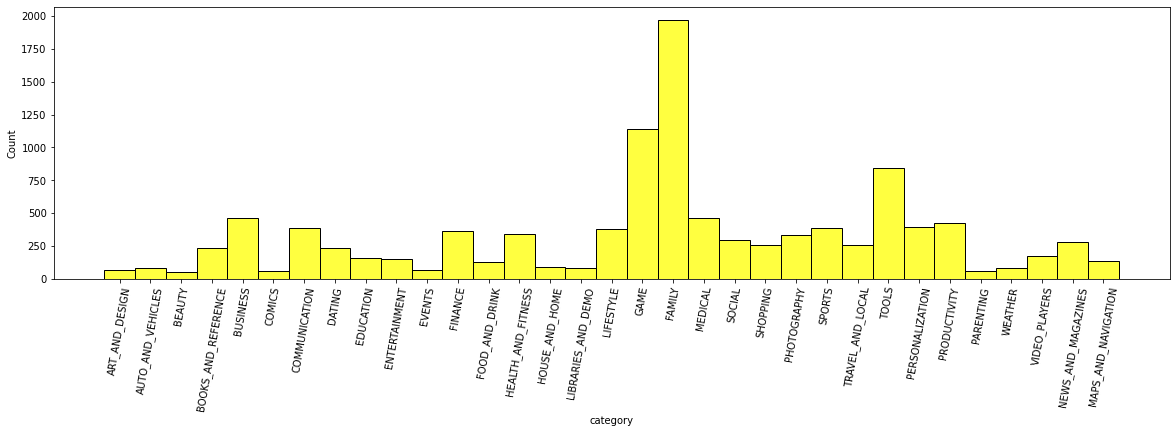

In [57]:
plt.figure(figsize=(20, 5))
fig = sns.histplot(x=df['category'], color='Yellow')
plt.xticks(rotation=80);

Now clarifying :

What is the distrubution of ratings?

Text(0.5, 1.0, 'Histogram of Ratings')

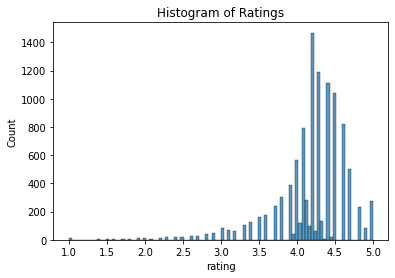

In [58]:
sns.histplot(data=df['rating'])
plt.title('Histogram of Ratings')

NOW we have check :

Which categories had the most installations?